In [1]:
import os

# Question 1 - Harris algorithm

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
PATH_DATA_1 = 'data/chess.jpg'

In [4]:
image = cv2.imread(PATH_DATA_1)

In [5]:
# Convert the input image into grayscale color
grayImage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [6]:
# Modify the data type
grayImage = np.float32(grayImage)

In [7]:
# Apply the cv2.cornerHarris method
dest = cv2.cornerHarris(grayImage, blockSize = 2, ksize = 3, k = 0.04)

In [8]:
# Result is dilated for marking the corners
dest = cv2.dilate(dest, None)

In [9]:
# Threshold for an optimal value
threshold = 0.01 * dest.max()

In [10]:
# Create an image copy to draw corners
corner_image = np.copy(image)

In [11]:
# Draw detected corners on the image
# Draw corners in red color
corner_image[dest > threshold] = [0, 0, 255]

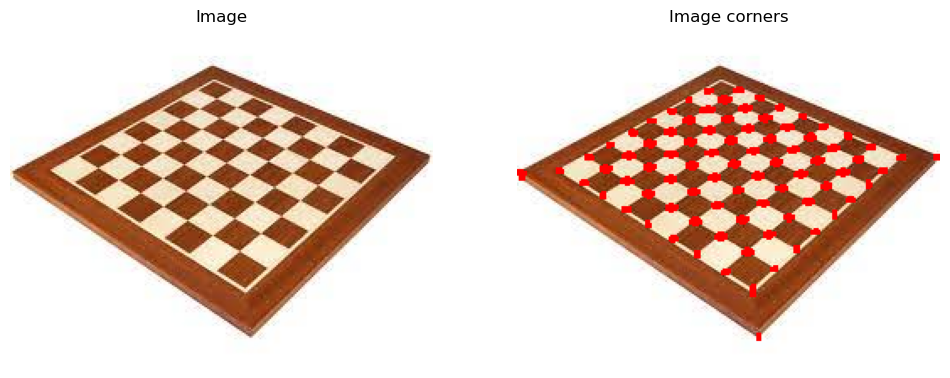

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(12, 8))

ax[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax[0].axis('off')
ax[0].set_title('Image')

ax[1].imshow(cv2.cvtColor(corner_image, cv2.COLOR_BGR2RGB))
ax[1].axis('off')
ax[1].set_title('Image corners')

plt.show()

# Question 2 -  Image Pyramid

In [13]:
import cv2
import matplotlib.pyplot as plt

In [14]:
PATH_DATA_2 = 'data/books.jpg'

In [15]:
image = cv2.imread(PATH_DATA_2)

In [16]:
layer = image.copy()

In [17]:
images = []

for i in range(4):
    # Downscale the image using Gaussian pyramid
    layer = cv2.pyrDown(layer)
    images.append(layer)
    print('Shape:', layer.shape)

Shape: (425, 425, 3)
Shape: (213, 213, 3)
Shape: (107, 107, 3)
Shape: (54, 54, 3)


#### Size 425x425

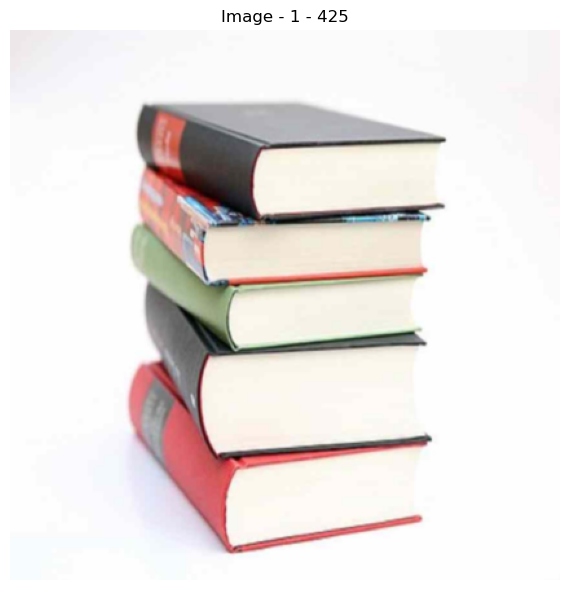

In [18]:
plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(images[0], cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Image - 1 - ' + str(images[0].shape[0]))
plt.tight_layout()
plt.show()

#### Size 213x213

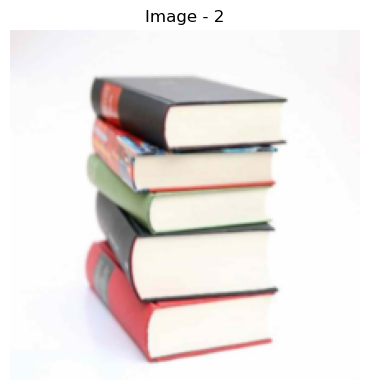

In [19]:
plt.figure(figsize=(4, 4))
plt.imshow(cv2.cvtColor(images[1], cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Image - 2')
plt.tight_layout()
plt.show()

#### Size 107x107

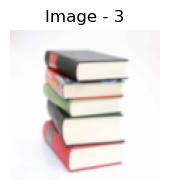

In [20]:
plt.figure(figsize=(2, 2))
plt.imshow(cv2.cvtColor(images[2], cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Image - 3')
plt.tight_layout()
plt.show()

#### Size 54x54

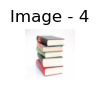

In [21]:
plt.figure(figsize=(1, 1))
plt.imshow(cv2.cvtColor(images[2], cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Image - 4')
plt.tight_layout()
plt.show()

# Question 3 - Image Segmentation with Watershed

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [23]:
PATH_DATA_1 = 'data/chess.jpg'

In [24]:
image = cv2.imread(PATH_DATA_1)

In [25]:
# Convert the input image into grayscale color
grayImage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [26]:
# Apply thresholding
ret, thresh = cv2.threshold(grayImage, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

In [27]:
# Perform morphological operations to clean the image - remove noise
kernel = np.ones((3,3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations = 2)

In [28]:
# sure background area
sure_bg = cv2.dilate(opening,kernel, iterations=3)

In [29]:
# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7*dist_transform.max(),255,0)

In [30]:
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

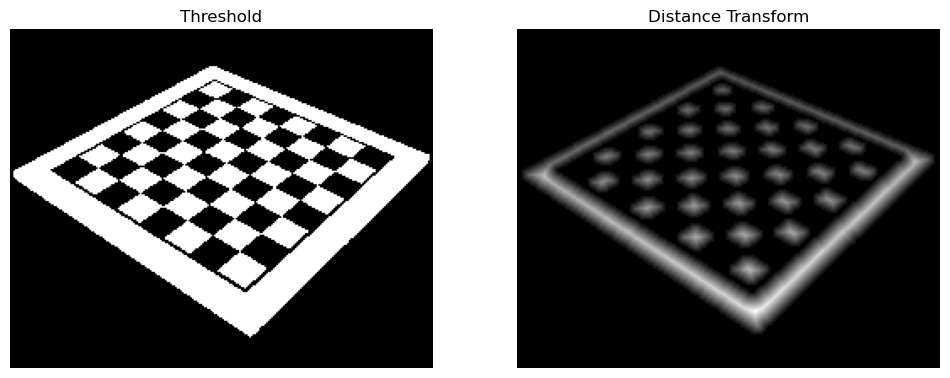

In [31]:
fig, ax = plt.subplots(1, 2, figsize=(12, 8))

ax[0].imshow(thresh, cmap = 'gray')
ax[0].axis('off')
ax[0].set_title('Threshold')

ax[1].imshow(dist_transform, cmap = 'gray')
ax[1].axis('off')
ax[1].set_title('Distance Transform')

plt.show()

In [32]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers + 1

# Now, mark the region of unknown with zero
markers[unknown==255] = 0

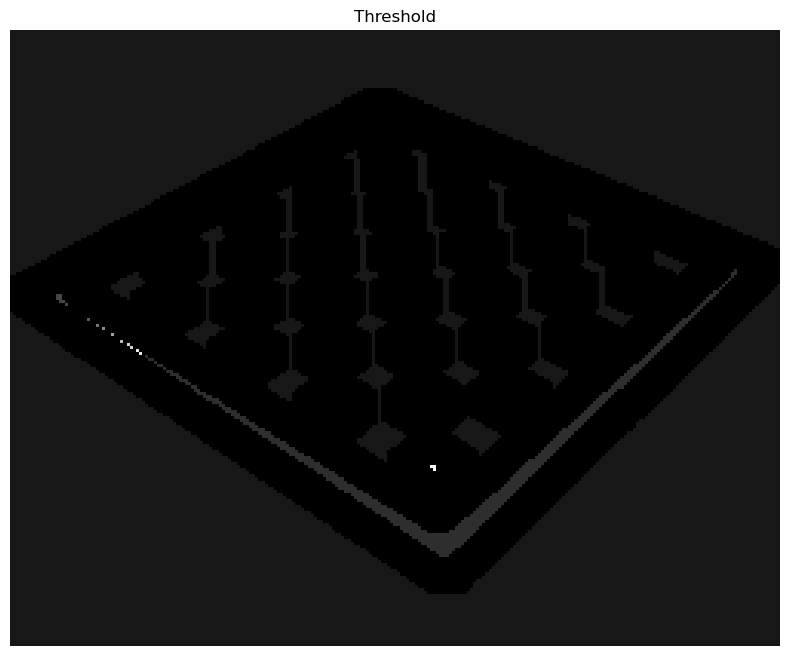

In [33]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

ax.imshow(markers, cmap = 'gray')
ax.axis('off')
ax.set_title('Threshold')

plt.show()

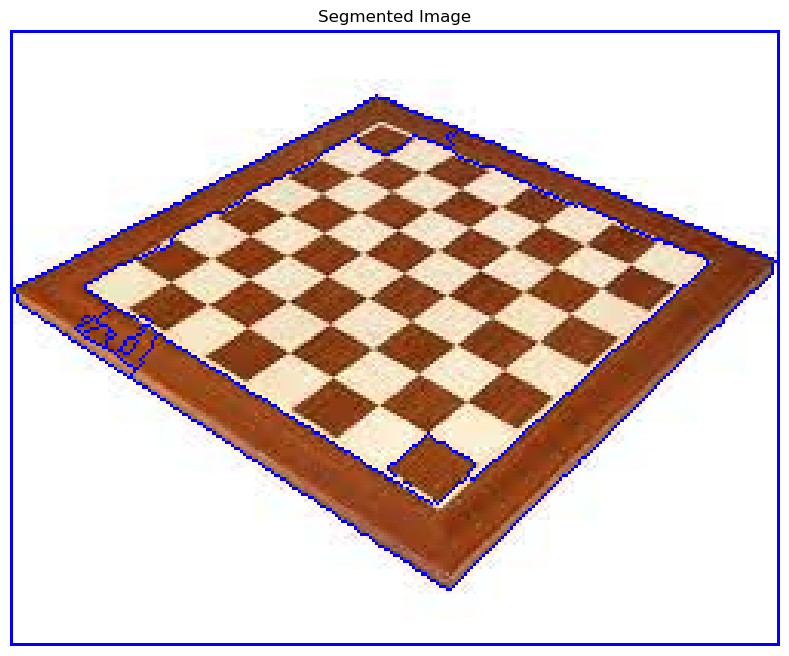

In [34]:
markers = cv2.watershed(image, markers)
image[markers == -1] = [255,0,0]

fig, ax = plt.subplots(1, 1, figsize=(12, 8))

ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax.axis('off')
ax.set_title('Segmented Image')

plt.show()

# Question 4 - SIFT algorithm

In [35]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [36]:
PATH_DATA_1 = 'data/chess_pieces.jpg'

In [37]:
image = cv2.imread(PATH_DATA_1)

In [38]:
# Convert the input image into grayscale color
grayImage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [39]:
sift = cv2.SIFT_create()
kp = sift.detect(grayImage, None)

In [40]:
# Marking the keypoint on the image using circles
image = cv2.drawKeypoints(grayImage, kp, image, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

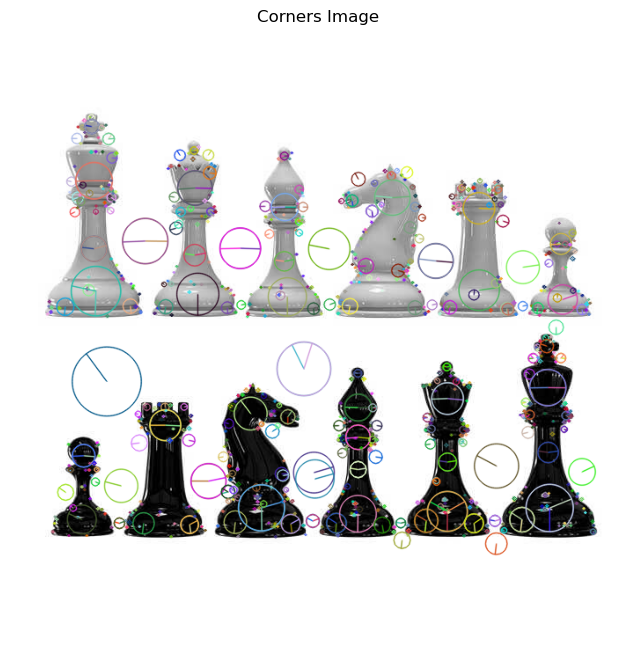

In [41]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax.axis('off')
ax.set_title('Corners Image')

plt.show()

# Question 5 - YOLO

In [42]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time

In [43]:
WHITE = (255, 255, 255)
img = None
img0 = None
outputs = None

In [44]:
# Load names of classes and get random colors
coco_names = 'yolo/coco.names'
classes = open(coco_names).read().strip().split('\n')
np.random.seed(42)
colors = np.random.randint(0, 255, size=(len(classes), 3), dtype='uint8')

In [45]:
# Give the configuration and weight files for the model and load the network.
yolo_config = 'yolo/yolov3.cfg'
yolo_weights = 'yolo/yolov3.weights'

net = cv2.dnn.readNetFromDarknet(yolo_config, yolo_weights)
net.setPreferableBackend(cv2.dnn.DNN_BACKEND_OPENCV)

In [46]:
# determine the output layer
ln = net.getLayerNames()
ln = [ln[i - 1] for i in net.getUnconnectedOutLayers()]

In [47]:
def load_image(path):
    '''
        Load images
        Plot images
    '''
    global img, img0, outputs, ln

    img0 = cv2.imread(path)
    img = img0.copy()
    
    blob = cv2.dnn.blobFromImage(img, 1/255.0, (416, 416), swapRB=True, crop=False)

    net.setInput(blob)
    t0 = time.time()
    outputs = net.forward(ln)
    t = time.time() - t0

    # combine the 3 output groups into 1 (10647, 85)
    # large objects (507, 85)
    # medium objects (2028, 85)
    # small objects (8112, 85)
    outputs = np.vstack(outputs)

    post_process(img, outputs, 0.5)

    # Plotting
    fig = plt.figure(figsize=(12, 8))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(f'forward propagation time={t:.3}')
    plt.show()

In [48]:
def post_process(img, outputs, conf):
    H, W = img.shape[:2]

    boxes = []
    confidences = []
    classIDs = []

    for output in outputs:
        scores = output[5:]
        classID = np.argmax(scores)
        confidence = scores[classID]
        if confidence > conf:
            x, y, w, h = output[:4] * np.array([W, H, W, H])
            p0 = int(x - w//2), int(y - h//2)
            p1 = int(x + w//2), int(y + h//2)
            boxes.append([*p0, int(w), int(h)])
            confidences.append(float(confidence))
            classIDs.append(classID)
            # cv.rectangle(img, p0, p1, WHITE, 1)

    indices = cv2.dnn.NMSBoxes(boxes, confidences, conf, conf-0.1)
    if len(indices) > 0:
        for i in indices.flatten():
            (x, y) = (boxes[i][0], boxes[i][1])
            (w, h) = (boxes[i][2], boxes[i][3])
            color = [int(c) for c in colors[classIDs[i]]]
            cv2.rectangle(img, (x, y), (x + w, y + h), color, 4)
            text = "{}: {:.4f}".format(classes[classIDs[i]], confidences[i])
            cv2.putText(img, text, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.7, color, 3)

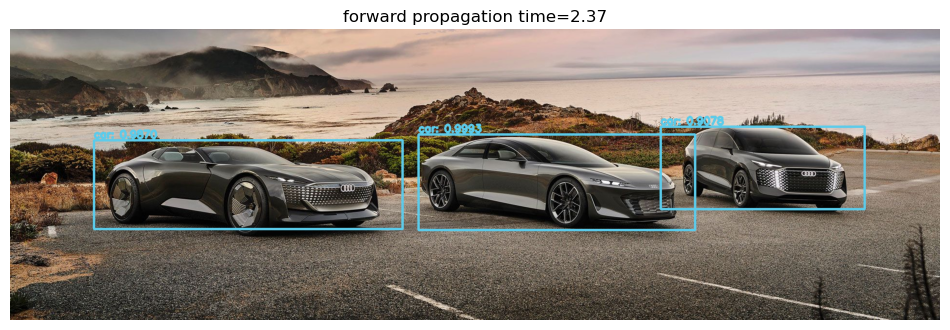

In [49]:
load_image('data/cars.jpg')

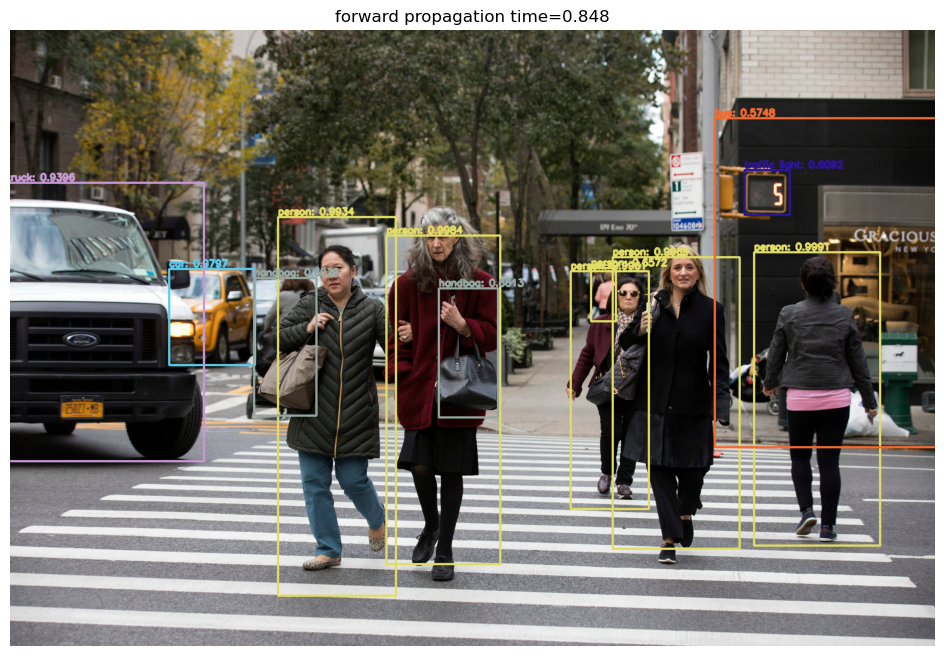

In [50]:
load_image('data/pedestrians.jpg')

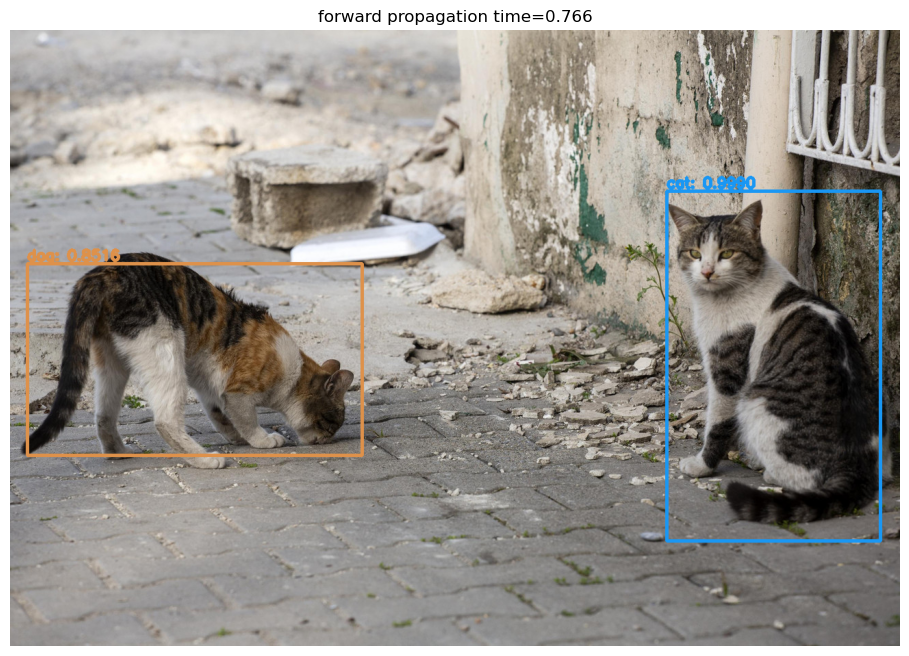

In [51]:
load_image('data/cats.jpg')

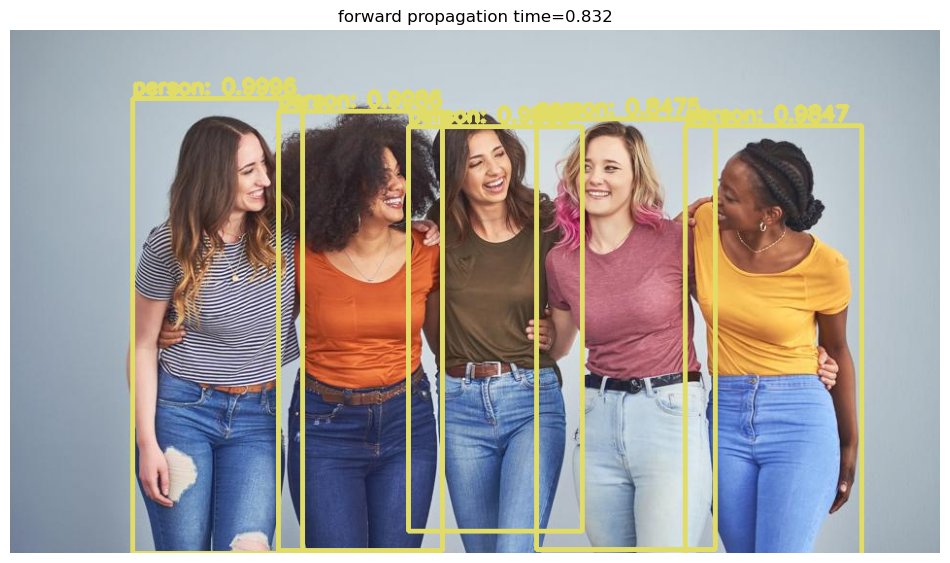

In [52]:
load_image('data/women.jpg')

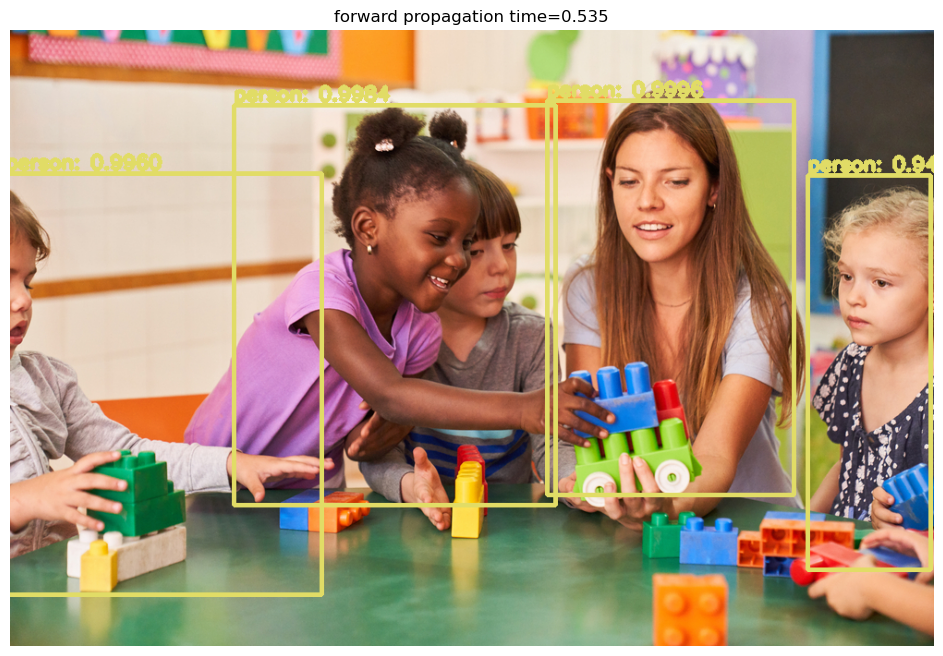

In [53]:
load_image('data/kids.jpg')